# Analyse des données générées par le simulateur

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./report_simulation.csv', sep=';')
print('Nb de lignes chargées : ', len(data))

data.head()

Nb de lignes chargées :  3534


,frame,parameter,RoadItem_1,RoadItem_2,RoadItem_3,RoadItem_4,RoadItem_5,RoadItem_6,RoadItem_7,RoadItem_8,RoadItem_9,RoadItem_10
0,0,running,True,False,False,False,False,False,False,False,False,False
1,0,speed,4.2,1,1,3,4,3,1,2,4,1
2,0,position,"(42.0, 0.8267972847076845)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,running,True,False,False,False,False,False,False,False,False,False
4,1,speed,4.41,1,1,3,4,3,1,2,4,1


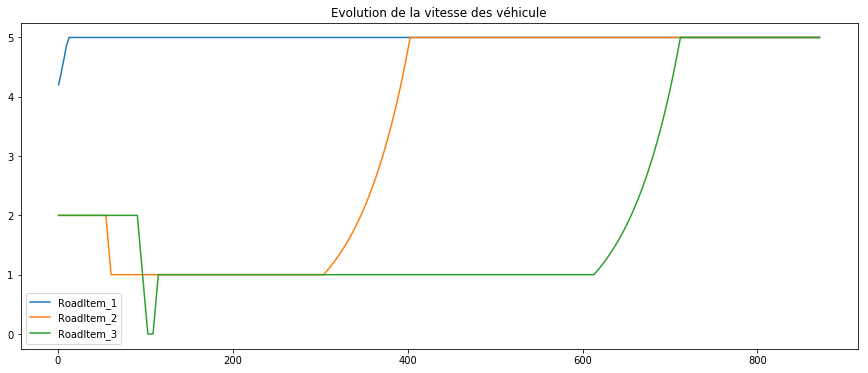

In [10]:
data[data.parameter=='speed'][['RoadItem_1', 'RoadItem_2', 'RoadItem_3']].astype('float').plot(figsize=(15,6), title="Evolution de la vitesse des véhicule")

In [75]:
# Calcul de la distance entre les véhicules
# hypothèse : les véhicules se suivent dans l'ordre
from parameters import DISTANCE
from roadmaps.position import Position, NONE_POSITION
positions = data[data.parameter=='position'].set_index('frame').iloc[:,1:]

positions.RoadItem_1 = positions.RoadItem_1.map(lambda x: x if isinstance(x, Position) else Position(*eval(x)) if not pd.isna(x) else NONE_POSITION)
positions.RoadItem_2 = positions.RoadItem_2.map(lambda x: x if isinstance(x, Position) else Position(*eval(x)) if not pd.isna(x) else NONE_POSITION)
positions.RoadItem_3 = positions.RoadItem_3.map(lambda x: x if isinstance(x, Position) else Position(*eval(x)) if not pd.isna(x) else NONE_POSITION)

positions['D1_2'] = positions.apply(lambda row: DISTANCE(row.RoadItem_1, row.RoadItem_2) if row.RoadItem_1!=NONE_POSITION and row.RoadItem_2!=NONE_POSITION else None, axis=1)
positions['D2_3'] = positions.apply(lambda row: DISTANCE(row.RoadItem_2, row.RoadItem_3) if row.RoadItem_2!=NONE_POSITION and row.RoadItem_3!=NONE_POSITION else None, axis=1)

positions

,RoadItem_1,RoadItem_2,RoadItem_3,RoadItem_4,RoadItem_5,RoadItem_6,RoadItem_7,RoadItem_8,RoadItem_9,RoadItem_10,D1_2,D2_3
frame,,,,,,,,,,,,
0,"<Position (42.0,0.8267972847076845)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<Position (42.0,0.8267972847076845)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"<Position (41.80360721442886,0.8267972847076845)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"<Position (41.607214428857716,0.82679728470768...","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"<Position (41.410821643286575,0.82679728470768...","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,"<Position (None,None)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,"(-40.82164328657315, 0.8267972847076845)",NaN,NaN
1174,"<Position (None,None)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,"(-41.067134268537075, 0.8267972847076845)",NaN,NaN
1175,"<Position (None,None)>","<Position (None,None)>","<Position (None,None)>",NaN,NaN,NaN,NaN,NaN,NaN,"(-41.312625250501, 0.8267972847076845)",NaN,NaN


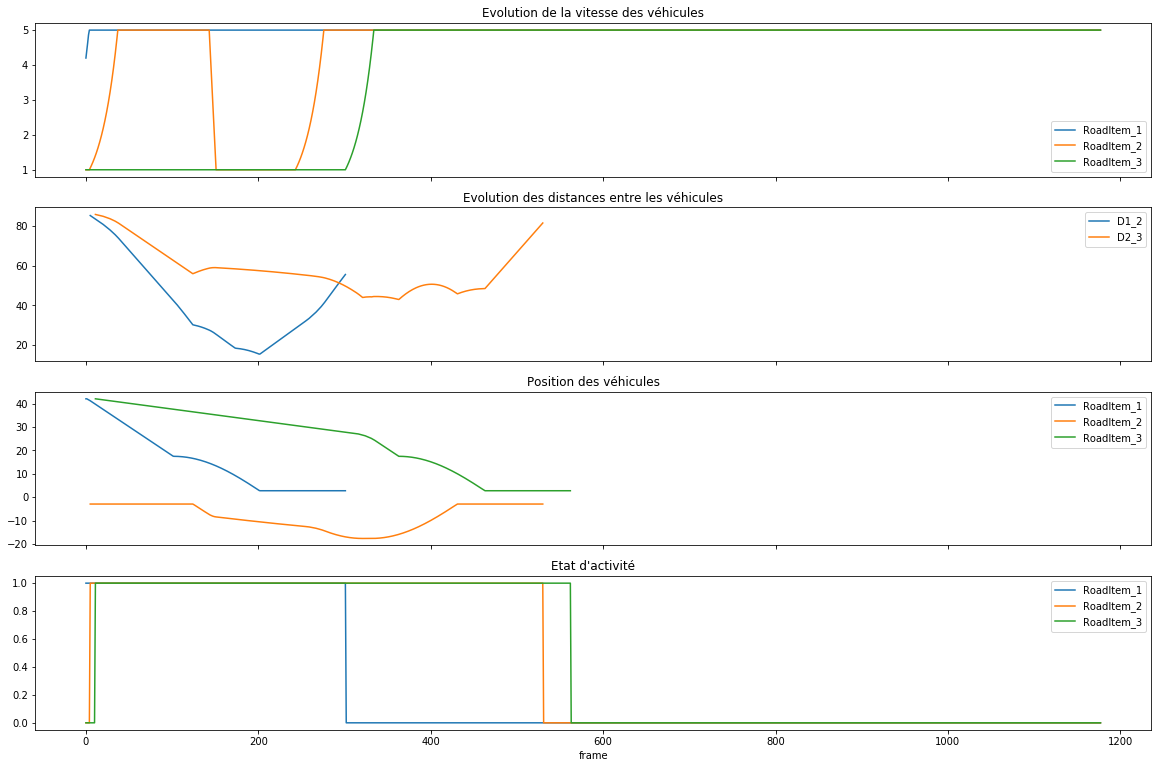

In [76]:
fig, ax = plt.subplots(4,1, figsize=(20,13), sharex=True)
data[data.parameter=='speed'].set_index('frame')[['RoadItem_1', 'RoadItem_2', 'RoadItem_3']].astype('float').plot(ax=ax[0], title="Evolution de la vitesse des véhicules")
positions[['D1_2', 'D2_3']].plot(ax=ax[1], title="Evolution des distances entre les véhicules")
positions[['RoadItem_1', 'RoadItem_2', 'RoadItem_3']].applymap(lambda pos:pos.x).plot(ax=ax[2], title="Position des véhicules")
data[data.parameter=='running'].set_index('frame')[['RoadItem_1', 'RoadItem_2', 'RoadItem_3']].applymap(lambda x: 1 if eval(x) else 0).plot(ax=ax[3], title="Etat d'activité")